In [1]:
%matplotlib inline

# from spectral_cube import SpectralCube
from radio_beam import Beam
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import aplpy
import pickle
from config import *
import velocity_tools.coordinate_offsets as c_offset


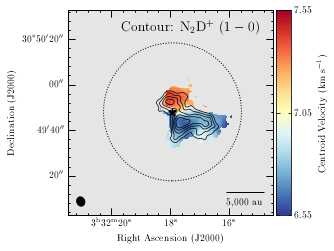

In [5]:
col_text = 'black'
fig=aplpy.FITSFigure(N2Dp_Vlsr, figsize=(4,4))
fig.show_colorscale(vmin=6.55, vmax=7.55, cmap='RdYlBu_r')
setup_plot_noema(fig, label_col=col_text, star_col='black')
fig.add_colorbar()
# fig.add_label(0.74, 0.838, r'N$_2$D$^+$ ($1-0$)', color=col_text, relative=True, size=14, weight=60)
fig.add_label(0.60, 0.91, r'Contour: N$_2$D$^+$ ($1-0$)', color=col_text, relative=True, size=14, weight=60)
fig.colorbar.set_axis_label_text(r'Centroid Velocity (km s$^{-1}$)')

fig.show_contour(N2Dp_TdV, levels=N2Dp_TdV_levels, colors=col_text, linewidths=0.7)
fig.colorbar.set_ticks([6.55, 7.05, 7.55])
# with PB
freq_N2Dp = fits.getheader(N2Dp_TdV)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_interferometer(freq_N2Dp, telescope='NOEMA').to(u.deg)*0.5, 
                 ls=':', color=col_text)

In [24]:
# file_in=N2Dp_Vlsr, pa_angle=0*u.deg, inclination=0*u.deg):
Per2_inc = -43*u.deg
Per2_pa = 130*u.deg
Per2_v_lsr = 7.05*u.km/u.s
dr_Per2, v_Per2 = per_emb_2_get_vc_proj_r(N2Dp_Vlsr, pa_angle=Per2_pa, inclination=Per2_inc)
dv_Per2 = v_Per2 - Per2_v_lsr
j_Per2 = (dr_Per2 * dv_Per2).to(u.km/u.s*u.pc)

In [11]:
# file_Vlsr = 'data/Per-emb-2-N2D+_1-0_fit_Vc.fits'
# file_Vlsr_error = 'data/Per-emb-2-N2D+_1-0_fit_eVc.fits'
hd_Per2 = fits.getheader(N2Dp_Vlsr)

beam_Per2 = (hd_Per2['BMAJ'] * u.deg * distance*u.pc).to(u.au, equivalencies=u.dimensionless_angles())
oversample_Per2 = np.abs(np.pi / 4. * hd_Per2['BMAJ']**2 / hd_Per2['CDELT1'] / hd_Per2['CDELT2'])

# j_Per2_all = dr_Per2_all * dv_Per2_all
# v_error_Per2_all = fits.getdata(file_Per2_error) * dv_Per2_all.unit
# j_error_Per2_all = dr_Per2_all * v_error_Per2_all

In [25]:
bin_size = (0.3*distance*u.pc/(250*u.pc)).decompose()
import velocity_tools.coordinate_offsets as c_offset

bin_x_Per2, bin_j_Per2, bin_dx_Per2, bin_dj_Per2 = c_offset.average_profile( np.abs(dr_Per2.value), np.abs(j_Per2.value), bin_size.value, log=True, oversample=oversample_Per2)
bin_x2_Per2, bin_v_Per2, bin_dx2_Per2, bin_dv_Per2 = c_offset.average_profile( np.abs(dr_Per2.value), np.abs(dv_Per2.value), bin_size.value, log=True, oversample=oversample_Per2)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
bin_size

<Quantity 0.36>

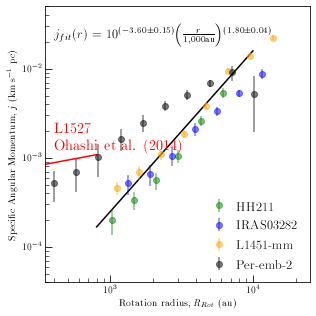

In [26]:
HH211_structure = pickle.load(open("data/HH211_save.p", "rb" ) )
IRAS03282_structure = pickle.load(open("data/IRAS03282_save.p", "rb" ) )
L1451mm_structure = pickle.load(open("data/L1451mm_save.p", "rb" ) )

fig, ax = plt.subplots(1, 1, figsize=(4.5,4.5))
plt.subplots_adjust(wspace=0,hspace=0)

col_s = ['green', 'blue', 'orange', 'black']

ax.errorbar( HH211_structure['bin_x'], HH211_structure['bin_j'], yerr=HH211_structure['bin_j_err'], 
    color=col_s[0],  label='HH211',     linestyle="None", alpha=0.5, zorder=40, marker='o')
ax.errorbar( IRAS03282_structure['bin_x'], IRAS03282_structure['bin_j'], yerr=IRAS03282_structure['bin_j_err'], 
    color=col_s[1],   label='IRAS03282', linestyle="None", alpha=0.5, zorder=40, marker='o')
ax.errorbar( L1451mm_structure['bin_x'], L1451mm_structure['bin_j'], yerr=L1451mm_structure['bin_j_err'],
    color=col_s[2], label='L1451-mm',  linestyle="None", alpha=0.5, zorder=40, marker='o')

ax.errorbar( bin_x_Per2, bin_j_Per2, yerr=bin_dj_Per2,
    color=col_s[3], label='Per-emb-2',  linestyle="None", alpha=0.5, zorder=40, marker='o')

# ax.errorbar(bin_x_Per2,    bin_j_Per2,    yerr=bin_dj_Per2,    color=col_s[4],   label='Per-emb-2', linestyle="None", alpha=0.5, zorder=40, marker='o')

ax.legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':13}, handlelength=1, loc=4)
ax.set_xlabel("Rotation radius, $R_{Rot}$ (au)")
ax.set_ylabel("Specific Angular Momentum, $j$ (km s$^{-1}$ pc)")

ax.set_yscale("log")
ax.set_xscale("log")
ay = 4e-5 # [ay,by] is range of vertical axis
by = 0.05
xa = 350 # [ax,bx] is range of horizontal axis 
xb = 25000

ax.set_xlim(xa, xb)
ax.set_ylim(ay, by)

ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

fit_par10 = np.array( [ -3.60, 1.80] )
fit_par10err = np.array( [ 0.15, 0.04])

fit_label=r'$j_{fit}(r)$ = $10^{('+r'{0:4.2f} \pm {1:4.2f})'.format(fit_par10[0], fit_par10err[0])+'}$'
fit_label+=r'$\left(\frac{r}{1,000\rm au}\right)$$^{('+r'{0:4.2f} \pm {1:4.2f})'.format(fit_par10[1], fit_par10err[1])+'}$'

rad_min=800.0
rad_max=1e4
x_j_fit=np.array([rad_min,5000.,rad_max])
j_fit=10**(fit_par10[0])*(x_j_fit/1e3)**fit_par10[1]

ax.text(4.0e2, 2e-2, fit_label, fontsize=13)
ax.plot(x_j_fit,j_fit, '-', color='black', zorder=1)

# L1527
x_v_L1527= np.array([30., 800.])
v2_L1527   = 1.2* (x_v_L1527/100.)**-0.7
ax.plot(x_v_L1527 , x_v_L1527*v2_L1527*(u.au.to(u.pc)), '-', color='red')
ax.text(400, 1.25e-3, 'L1527\nOhashi et al. (2014)', fontsize=15, color='red')#, horizontal_align='left')
#
plt.tight_layout()